In [1]:
import re
import pandas as pd
import jieba
from snownlp import SnowNLP

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

from keras.layers import Dense, Input, LSTM
from keras.models import Model
import matplotlib.pyplot as plt

定义方法

In [2]:
# 情感分类
def fenlei(request):

    # j = '#印尼官方回应中国游客巴厘岛遇害事件#】5月1日，位于印尼巴厘岛的洲际酒店发生一起惊悚的命案，两名中国游客不幸身亡。印尼旅游和创意经济部长在接受CGTN记者采访时表示，对中国游客遇害事件深感悲痛、深表哀悼，印尼警方正在全力调查该事件，并已形成初步报告。他还表示，#巴厘岛#警方与执法部门已经组成特别小组，将尽快调查到底、查明真相，坚决杜绝此类事件的再次发生。LCGTN记者团的微博'
    s = SnowNLP(request)
    print(s.sentiments)

    # for item in tqdm(WeiBo.objects.all()): # 按行读取数据
    #     emotion = '正向' if SnowNLP(item.content).sentiments >0.45 else '负向'
    #     WeiBo.objects.filter(id=item.id).update(emotion=emotion)

    # return JsonResponse({'status':1,'msg':'操作成功'} )

# 清洗文本
def clearTxt(line:str):
    if(line != ''):
        line = line.strip()
        # 去除文本中的英文和数字
        line = re.sub("[a-zA-Z0-9]", "", line)
        # 去除文本中的中文符号和英文符号
        line = re.sub("[\s+\.\!\/_,$%^*(+\"\'；：“”．]+|[+——！，。？?、~@#￥%……&*（）]+", "", line)
        return line
    print("文本为空！")
    return None


#文本切割
def sent2word(line):
    segList = jieba.cut(line,cut_all=False)
    # 去停用词
    stopwords1 = [line.strip() for line in open("stopwords/baidu_stopwords.txt", 'r', encoding="utf-8").readlines()]
    stopwords2 = [line.strip() for line in open("stopwords/cn_stopwords.txt", 'r', encoding="utf-8").readlines()]
    stopwords3 = [line.strip() for line in open("stopwords/hit_stopwords.txt", 'r', encoding="utf-8").readlines()]
    stopwords4 = [line.strip() for line in open("stopwords/scu_stopwords.txt", 'r', encoding="utf-8").readlines()]
    stopwords1.extend(stopwords2)
    stopwords1.extend(stopwords3)
    stopwords1.extend(stopwords4)
    # print(stopwords1)
    word_cut = [i for i in segList if i not in stopwords1 and len(i)!=1]
    #print(word_cut)
    segSentence = ''
    for word in word_cut:
        if word != '\t':
            segSentence += word + " "
    return segSentence.strip()





数据处理

In [3]:
#读取数据
# data = pd.read_csv('%23新冠肺炎%23.csv')
data = pd.read_csv('%23俄乌战争%23.csv')
print(data.shape)

# 清除重复数据
data.drop_duplicates('用户昵称',keep='first',inplace=True)
print(data.shape)
# 清洗文本
clean_data = [item for item in data['用户昵称']]
clean_data = [clearTxt(item) for item in clean_data]
clean_data = [sent2word(item) for item in clean_data]

# print(clean_data)

# 该类会将文本中的词语转换为词频矩阵，矩阵元素a[i][j] 表示j词在i类文本下的词频
vectorizer = CountVectorizer()
print("词频矩阵\n",vectorizer.fit_transform(clean_data))
# 该类会统计每个词语的tf-idf权值
tf_idf_transformer = TfidfTransformer()
# 将文本转为词频矩阵并计算tf-idf
tfidf = tf_idf_transformer.fit_transform(vectorizer.fit_transform(clean_data))
print(tfidf)
# 获取词袋模型中的所有词语
tfidf_matrix = tfidf.toarray()

Building prefix dict from the default dictionary ...
Loading model from cache /var/folders/s9/b33d8sfd6c3626p96qkb_s240000gn/T/jieba.cache


(134, 17)
(128, 17)


Loading model cost 0.254 seconds.
Prefix dict has been built successfully.


词频矩阵
   (0, 140)	1
  (0, 97)	1
  (0, 785)	1
  (0, 775)	2
  (0, 241)	1
  (0, 182)	4
  (0, 628)	4
  (0, 998)	1
  (0, 92)	3
  (0, 947)	1
  (1, 241)	1
  (1, 182)	2
  (1, 628)	2
  (1, 998)	1
  (1, 92)	4
  (1, 196)	1
  (1, 534)	1
  (1, 224)	1
  (1, 1294)	1
  (1, 703)	1
  (1, 521)	1
  (1, 922)	3
  (1, 385)	2
  (1, 607)	2
  (1, 1422)	2
  :	:
  (126, 628)	1
  (126, 947)	1
  (126, 715)	1
  (126, 1435)	3
  (126, 251)	1
  (126, 827)	1
  (126, 1039)	1
  (126, 1342)	1
  (126, 223)	1
  (126, 284)	1
  (126, 1510)	1
  (126, 354)	1
  (126, 312)	1
  (126, 34)	1
  (126, 16)	1
  (126, 1518)	1
  (126, 1206)	1
  (127, 775)	1
  (127, 801)	1
  (127, 715)	1
  (127, 1435)	1
  (127, 1402)	2
  (127, 259)	2
  (127, 1078)	1
  (127, 96)	1
  (0, 998)	0.14843742098580442
  (0, 947)	0.19619251665560392
  (0, 785)	0.3761255035195232
  (0, 775)	0.1980347107096539
  (0, 628)	0.46114424616488525
  (0, 241)	0.16046908741659693
  (0, 182)	0.3720368470123512
  (0, 140)	0.3420347126760226
  (0, 97)	0.32907399551618116
  (0, 92)

In [4]:
word = vectorizer.get_feature_names_out()
for i in range(len(tfidf_matrix)):
    for j in range(len(word)):
        print(word[j],tfidf_matrix[i][j])

一个月 0.0
一任 0.0
一份 0.0
一位 0.0
一半 0.0
一名 0.0
一场 0.0
一家 0.0
一年 0.0
一度 0.0
一张 0.0
一扫而光 0.0
一支 0.0
一架 0.0
一栋 0.0
一步 0.0
一段 0.0
一系列 0.0
一辆 0.0
一部分 0.0
一门 0.0
一项 0.0
万亿 0.0
万元 0.0
万名 0.0
万多 0.0
万精兵 0.0
万里 0.0
三个 0.0
三十多岁 0.0
三号 0.0
三周 0.0
三者 0.0
三辆 0.0
上传 0.0
上午 0.0
上合 0.0
上将 0.0
上游 0.0
上演 0.0
上空 0.0
上级 0.0
下午 0.0
下属 0.0
下落 0.0
下降 0.0
不到 0.0
不可估量 0.0
不好 0.0
不明 0.0
不符 0.0
不该 0.0
不轻 0.0
与众不同 0.0
与泽 0.0
专家 0.0
专机 0.0
专车 0.0
世界 0.0
世纪 0.0
业余 0.0
业务 0.0
丛林 0.0
东北亚 0.0
东四 0.0
东方 0.0
东西 0.0
东部 0.0
两个 0.0
两倍 0.0
两千元 0.0
两大债 0.0
两架 0.0
丧生 0.0
中军 0.0
中华民国 0.0
中压 0.0
中国 0.0
中心 0.0
中日 0.0
主力 0.0
主席 0.0
主战 0.0
主题 0.0
举办 0.0
之狐 0.0
之窗 0.0
之遥 0.0
之间 0.0
乌东 0.0
乌之战 0.0
乌克 0.0
乌克兰 0.395845284035584
乌克兰人 0.0
乌军 0.0
乌军架 0.0
乌军豹 0.0
乌方 0.32907399551618116
乌波尔 0.0
乔治 0.0
乔美 0.0
乘员 0.0
乘坐 0.0
九个 0.0
九年 0.0
争夺 0.0
事件 0.0
事儿 0.0
事情 0.0
二级 0.0
五星上将 0.0
五架 0.0
五角大楼 0.0
亚历山大 0.0
亚速 0.0
亚马逊 0.0
亡国 0.0
交接 0.0
交流 0.0
交谈 0.0
交通运输 0.0
享受 0.0
享年 0.0
亲属 0.0
人住 0.0
人体 0.0
人力 0.0
人口 0.0
人员 0.0
人员不足 0.0
人士 0.0
人大 0.0
人工智能 0.0
人权

In [10]:
tfidf_matrix.shape

(128, 1700)

生成词云

In [12]:
import wordcloud as wc
import matplotlib.pyplot as plt
# from scipy.misc import imread
# from imageio import imread
# from PIL import Image

def Cloud_words(words, path):
    # 引入字体
    # mask = np.array(Image.open('love.png'))
    # image_colors = ImageColorGenerator(mask)
    #从文本中生成词云图
    cloud = wc.WordCloud(
                          font_path="/System/Library/fonts/PingFang.ttc",#设置字体 
                          background_color='white', # 背景色为白色
                          height=600, # 高度设置
                          width=900, # 宽度设置
                          scale=20, # 长宽拉伸程度程度设置为20
                          prefer_horizontal=0.0, # 调整水平显示倾向程度
                          max_font_size=100, #字体最大值 
                          max_words=1000, # 设置最大显示字数为2000
                          relative_scaling=0.3, # 设置字体大小与词频的关联程度为0.3
                         )
    # 绘制词云图
    mywc = cloud.generate(words)
    plt.imshow(mywc)
    plt.axis('off')
    mywc.to_file(path)

In [14]:
print(','.join(clean_data))

今日 乌方 战报 战争 关注 俄乌 局势 最新进展 乌克兰 俄乌 局势 乌克兰 俄乌 战争 乌克兰 局势 俄乌 局势 新进展,俄罗斯联邦 大规模 入侵 乌克兰 第天 当天 夜间 敌军 乌克兰 发动 导弹 袭击 上午 乌克兰 总参谋部 发布 战况 俄罗斯 占领者 乌军 阵地 定居点 发动 空袭 并用 多管 火箭 系统 攻击 利曼 方向 敌军 实施 进攻 试图 乌军 卢甘 斯克州 新哥 罗夫卡 地区 阵地 驱逐 成功 巴赫 穆特 方向 守军 成功 击退 顿涅茨克 区别 霍夫卡 博格 诺夫 以南 地区 敌军 进攻 阿夫 季夫卡 方向 国防军 阻挡 俄军 阿夫 季夫卡 地区 林斯基 方向 守军 击退 林卡 地区 敌人 进攻 国防军 航空兵 入侵者 人员 地区 打击 摧毁 敌方 防空 导弹系统 导弹 炮兵部队 袭击 人力 武器 军事装备 集中区 指挥所 弹药 列车 火炮 射击 阵地 防空 武器 雷达站 通讯站 关注 俄乌 局势 最新进展 俄乌 局势 乌克兰 美国 俄乌战,年月日 俄罗斯 入侵 作战 信息 这天 夜间 敌人 乌克兰 发动 导弹 袭击 详细信息 稍后 公布 俄罗斯 占领者 五架 伊朗 赫德 攻击 无人机 袭击 两架 防空 系统 摧毁 俄罗斯 占领者 发动 空袭 利用 火箭 齐射 系统 发动 攻击 敌人 主力 利曼 巴赫 穆特 阿夫迪夫 林卡 方向 发生 冲突 巴赫 穆特 方向 我军 守军 成功 击退 顿涅茨克 别尔希夫 博赫达 尼夫 以南 地区 敌军 进攻 巴赫 穆特 南部 北部 进攻 边界 盘踞 扎波罗热 赫尔松 方向 敌军 力量 阻止 我军 乌克兰 国防军 梅利 托波尔 别尔江斯克 方向 发起 进攻 到达 边界 固守 阵地 敌方 目标 炮击 实施 炮兵 对抗 措施 国防军 航空兵 占领 人员 地区 打击 摧毁 敌方 防空 导弹系统 导弹部队 炮兵部队 袭击 人力 武器 军事装备 集中区 控制点 弹药库 炮兵阵地 防空 设施 雷达站 敌方 无线电 电子战 巴赫 穆特 乌克兰 俄乌 战争 乌克兰 反攻 俄罗,俄乌 战争 俄军 导弹 袭击 乌克兰 西部 利沃夫 建筑物 世界 微博 视频,俄乌 战争 俄军 导弹 袭击 乌克兰 西部 利沃夫 建筑物 微博 视频,八大 商人,趋势 向上,司机 乌克兰 保护 欧洲 普京 局势 新进展 俄乌 战争 墙上 微博 视频,拜登 阻止

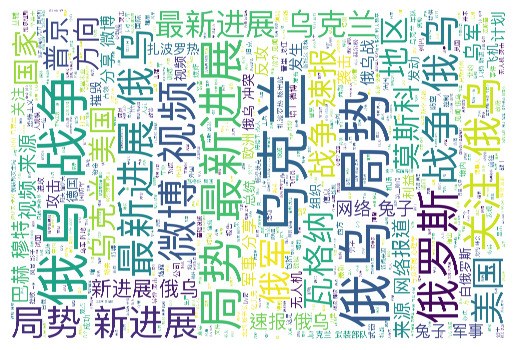

In [13]:
Cloud_words(','.join(clean_data), 'fulldata.png')

kmeans 聚类

In [15]:
from sklearn.cluster import KMeans
clf = KMeans(n_clusters=5)
result_list = clf.fit(tfidf_matrix)
result_list  = list(clf.predict(tfidf_matrix))

/Users/chengyq/anaconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [16]:
data['用户昵称']

0      今日乌方战报（战争第498）#关注俄乌局势最新进展##乌克兰##俄乌局势##乌克兰##俄乌战...
1      俄罗斯联邦大规模入侵乌克兰的第498天开始了。当天夜间，敌军再次对乌克兰发动导弹袭击。7月6...
2      截至2023年7月6日6点有关俄罗斯入侵的作战信息❗️主要总结：➡️这天夜间，敌人再次对乌克...
3                    #俄乌战争#俄军导弹袭击乌克兰西部利沃夫一建筑物L寰亚看世界的微博视频
4                   #俄乌战争#俄军导弹袭击乌克兰西部利沃夫一建筑物L寰亚SYHP的微博视频
                             ...                        
129        【抡大锤装弹真费劲】#俄乌局势新进展##俄乌战争#（视频来源网络）L兔子军事分享的微博视频
130    #乌克兰#赫尔松上游的卡霍夫卡水电站被炸后，敖德萨黑海的海滩！#关注乌克兰局势最新进展##俄...
131               #乌克兰#导师罗马在实验田#关注乌克兰局势最新进展##俄乌战争##俄乌局势#
132    【前天车臣的卡德罗夫上传了一段视频，辟谣他生病的报道】#俄乌局势新进展##俄乌战争#（视频来...
133               菜鸟军虫#俄乌战争##武器装备#乌军豹2A6，扎波罗热。L菜鸟军虫的微博视频
Name: 用户昵称, Length: 128, dtype: object

将数据与标签整合

In [17]:
kmeans_result = pd.DataFrame(())
kmeans_result["data"] = data['用户昵称']
kmeans_result["label"] = result_list
kmeans_result

data  label
0    今日乌方战报（战争第498）#关注俄乌局势最新进展##乌克兰##俄乌局势##乌克兰##俄乌战...      2
1    俄罗斯联邦大规模入侵乌克兰的第498天开始了。当天夜间，敌军再次对乌克兰发动导弹袭击。7月6...      4
2    截至2023年7月6日6点有关俄罗斯入侵的作战信息❗️主要总结：➡️这天夜间，敌人再次对乌克...      4
3                  #俄乌战争#俄军导弹袭击乌克兰西部利沃夫一建筑物L寰亚看世界的微博视频      4
4                 #俄乌战争#俄军导弹袭击乌克兰西部利沃夫一建筑物L寰亚SYHP的微博视频      4
..                                                 ...    ...
129      【抡大锤装弹真费劲】#俄乌局势新进展##俄乌战争#（视频来源网络）L兔子军事分享的微博视频      0
130  #乌克兰#赫尔松上游的卡霍夫卡水电站被炸后，敖德萨黑海的海滩！#关注乌克兰局势最新进展##俄...      2
131             #乌克兰#导师罗马在实验田#关注乌克兰局势最新进展##俄乌战争##俄乌局势#      2
132  【前天车臣的卡德罗夫上传了一段视频，辟谣他生病的报道】#俄乌局势新进展##俄乌战争#（视频来...      0
133             菜鸟军虫#俄乌战争##武器装备#乌军豹2A6，扎波罗热。L菜鸟军虫的微博视频      3

[128 rows x 2 columns]

In [18]:
len(kmeans_result["label"].value_counts())

5

In [19]:
def plot_bar_normal(data,datax):
	# data：条形图数据
	# x:x轴坐标
	# path：图片保存路径

	# 创建x轴显示的参数（此功能在与在图像中x轴仅显示能被10整除的刻度，避免刻度过多分不清楚）
	# x_tick = list(map(lambda num: "" if num % 10 != 0 else num, x))

	# 创建一个分辨率为3000*100的空白画布
	# plt.figure(figsize=(100, 20), dpi=10)

	# # 设置x轴的说明
	# plt.xlabel('Classes', size=100)
	# # 设置y轴的说明
	# plt.ylabel('Number of data', size=100)

	# 打开网格线
	# plt.grid()
	# 绘制条形图
	# plt.bar(range(len(data)), data,  width=1)
	# # 显示x轴刻度
	# plt.xticks(range(len(data)), range(len(data)), size=100)
	# # 显示y轴刻度
	# plt.yticks(size=100)
	# 获取当前图像句柄
	# fig = plt.gcf()
	# plt.show()
	# 存储当前图像
	# fig.savefig(path)

	result = plt.bar(datax,data)
	plt.bar_label(result)
	for a,b in zip(datax,data):
		plt.text(a,b,b,ha='center',va='bottom')

	plt.show()
	

In [20]:
kmeans_result["label"].value_counts().index

Index([2, 4, 3, 0, 1], dtype='int32', name='label')

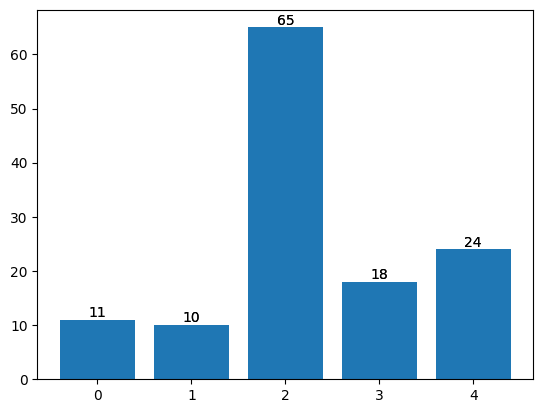

In [21]:
plot_bar_normal(kmeans_result["label"].value_counts().values,kmeans_result["label"].value_counts().index)


按聚类标签拆分数据集

In [22]:
kmeans_result

data  label
0    今日乌方战报（战争第498）#关注俄乌局势最新进展##乌克兰##俄乌局势##乌克兰##俄乌战...      2
1    俄罗斯联邦大规模入侵乌克兰的第498天开始了。当天夜间，敌军再次对乌克兰发动导弹袭击。7月6...      4
2    截至2023年7月6日6点有关俄罗斯入侵的作战信息❗️主要总结：➡️这天夜间，敌人再次对乌克...      4
3                  #俄乌战争#俄军导弹袭击乌克兰西部利沃夫一建筑物L寰亚看世界的微博视频      4
4                 #俄乌战争#俄军导弹袭击乌克兰西部利沃夫一建筑物L寰亚SYHP的微博视频      4
..                                                 ...    ...
129      【抡大锤装弹真费劲】#俄乌局势新进展##俄乌战争#（视频来源网络）L兔子军事分享的微博视频      0
130  #乌克兰#赫尔松上游的卡霍夫卡水电站被炸后，敖德萨黑海的海滩！#关注乌克兰局势最新进展##俄...      2
131             #乌克兰#导师罗马在实验田#关注乌克兰局势最新进展##俄乌战争##俄乌局势#      2
132  【前天车臣的卡德罗夫上传了一段视频，辟谣他生病的报道】#俄乌局势新进展##俄乌战争#（视频来...      0
133             菜鸟军虫#俄乌战争##武器装备#乌军豹2A6，扎波罗热。L菜鸟军虫的微博视频      3

[128 rows x 2 columns]

In [23]:
splitdata = []
for i in range(len(kmeans_result['label'].unique())):
    a = kmeans_result[kmeans_result['label'] == i]
    splitdata.append(a)

In [24]:
splitdata[0]

data  label
29   【乌克兰武装部队袭击后，#俄罗斯#控制的顿涅茨克州马基夫卡发生大规模爆炸】#俄乌局势新进展#...      0
49   【俄军在顿涅茨克的阿夫迪伊夫卡对乌军阵地发起袭击】#俄乌局势新进展##俄乌战争#（视频来源网...      0
61   【这车皮薄馅多这地方不合适该送博物馆了】#俄乌局势新进展##俄乌战争#(视频来源网络）L兔子...      0
80            【#俄乌战争#见闻6】#俄乌局势新进展#（视频来源网络）L兔子军事分享的微博视频      0
81            【#俄乌战争#见闻5】#俄乌局势新进展#（视频来源网络）L兔子军事分享的微博视频      0
82            【#俄乌战争#见闻4】#俄乌局势新进展#（视频来源网络）L兔子军事分享的微博视频      0
83            【#俄乌战争#见闻3】#俄乌局势新进展#（视频来源网络）L兔子军事分享的微博视频      0
85            【#俄乌战争#见闻2】#俄乌局势新进展#（视频来源网络）L兔子军事分享的微博视频      0
86            【#俄乌战争#见闻1】#俄乌局势新进展#（视频来源网络）L兔子军事分享的微博视频      0
129      【抡大锤装弹真费劲】#俄乌局势新进展##俄乌战争#（视频来源网络）L兔子军事分享的微博视频      0
132  【前天车臣的卡德罗夫上传了一段视频，辟谣他生病的报道】#俄乌局势新进展##俄乌战争#（视频来...      0

按聚类提取词频

In [40]:
def clean_and_plot(data, pic_out_path):
    # 清洗文本
    clean_data = [item for item in data]
    clean_data = [clearTxt(item) for item in clean_data]
    clean_data = [sent2word(item) for item in clean_data]
    Cloud_words(','.join(clean_data), pic_out_path)
    vectorizer = CountVectorizer()
    vectorizer.fit_transform(clean_data)
    x = vectorizer.get_feature_names_out()
    print('输出词袋内容：\n',x)
    output = sorted(vectorizer.vocabulary_.items(), key=lambda x: x[1], reverse=True)[:10]
    print('输出词频前十的词：\n',output)
    return output
    

输出词袋内容：
 ['一段' '上传' '乌克兰' '乌军' '俄乌' '俄军' '俄罗斯' '兔子' '军事' '分享' '前天' '博物馆' '卡对'
 '卡德罗夫' '发生' '发起' '合适' '地方' '基夫卡' '大规模' '大锤' '局势' '州马' '微博' '战争' '报道' '控制'
 '新进展' '来源' '武装部队' '爆炸' '生病' '皮薄馅多' '网络' '袭击' '装弹' '见闻' '视频' '费劲' '车臣'
 '辟谣' '迪伊夫' '阵地' '阿夫' '顿涅茨克']
输出词频前十的词：
 [('顿涅茨克', 44), ('阿夫', 43), ('阵地', 42), ('迪伊夫', 41), ('辟谣', 40), ('车臣', 39), ('费劲', 38), ('视频', 37), ('见闻', 36), ('装弹', 35)]


[('顿涅茨克', 44),
 ('阿夫', 43),
 ('阵地', 42),
 ('迪伊夫', 41),
 ('辟谣', 40),
 ('车臣', 39),
 ('费劲', 38),
 ('视频', 37),
 ('见闻', 36),
 ('装弹', 35)]

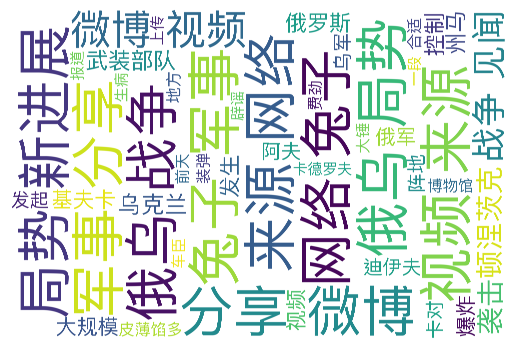

In [41]:
clean_and_plot(splitdata[0]['data'],'label0.png')

In [65]:

#-----------------------构建Encoder和Decoder层-----------------------
#降维可视化绘制2D图
encoding_dim = 2

#input placeholder 28*28
input_img = Input(shape=(1700,))

# #Encoder layers（压缩）
# encoded = Dense(512, activation='relu')(input_img)
# encoded = Dense(256, activation='relu')(encoded)
# encoded = Dense(128, activation='relu')(encoded)
# encoded = Dense(64, activation='relu')(encoded)
# encoded = Dense(10, activation='relu')(encoded)
# encoder_output = Dense(encoding_dim,activation="sigmoid")(encoded)

# #Decoder Layers（解压）
# decoded = Dense(10, activation='relu')(encoder_output)
# decoded = Dense(64, activation='relu')(decoded)
# decoded = Dense(128, activation='relu')(decoded)
# decoded = Dense(256, activation='relu')(decoded)
# decoded = Dense(512, activation='relu')(decoded)
# decoded = Dense(1064, activation='tanh')(decoded)

import tensorflow as tf
encoded = tf.reshape(input_img,[-1,1,1700])
encoded = LSTM(512, activation = 'tanh',return_sequences=True)(encoded)
encoded = LSTM(256, activation = 'tanh',return_sequences=True)(encoded)
encoded = LSTM(128, activation = 'tanh',return_sequences=True)(encoded)
encoded = LSTM(64, activation = 'tanh',return_sequences=True)(encoded)
encoded = LSTM(32, activation = 'tanh',return_sequences=True)(encoded)
encoded_output = LSTM(10, activation = 'tanh')(encoded)
encoded_output = Dense(encoding_dim,activation="softmax")(encoded_output)
print(encoded_output.shape)

decoded = Dense(10, activation='relu')(encoded_output)
decoded = Dense(32, activation='relu')(decoded)
decoded = Dense(64, activation='relu')(decoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(256, activation='relu')(decoded)
decoded = Dense(512, activation='relu')(decoded)
encoder_output = Dense(1700,activation='tanh')(decoded)
print(encoder_output.shape)


(None, 2)
(None, 1700)


In [57]:
#构造自编码器模型
autoencoder = Model(inputs=input_img, outputs=decoded)

#构建encoder模型进行可视化分析
encoder = Model(inputs=input_img, outputs=encoder_output)



#激活自编码器
autoencoder.compile(optimizer='adam', loss='mse')



In [67]:
#构造自编码器模型
lstmautoencoder = Model(inputs=input_img, outputs=encoder_output)

#构建encoder模型进行可视化分析
lstmencoder = Model(inputs=input_img, outputs=encoded_output)

#激活自编码器
lstmautoencoder.compile(optimizer='adam', loss='mse')

Epoch 1/20


2023-07-07 11:00:33.527239: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-07-07 11:00:34.034921: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-07-07 11:00:34.102250: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-07-07 11:00:34.168526: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-07-07 11:00:34.232231: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-07-07 11:00:34.301442: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-07-07 11:00:34.366062: I tensorflow/core/grappler/optimizers/cust

27/27 [==============================] - 5s 70ms/step - loss: 8.0939e-04
Epoch 2/20
27/27 [==============================] - 1s 29ms/step - loss: 6.0825e-04
Epoch 3/20
27/27 [==============================] - 1s 29ms/step - loss: 6.0438e-04
Epoch 4/20
27/27 [==============================] - 1s 28ms/step - loss: 6.0884e-04
Epoch 5/20
27/27 [==============================] - 1s 28ms/step - loss: 6.1264e-04
Epoch 6/20
27/27 [==============================] - 1s 27ms/step - loss: 6.1797e-04
Epoch 7/20
27/27 [==============================] - 1s 28ms/step - loss: 6.1071e-04
Epoch 8/20
27/27 [==============================] - 1s 27ms/step - loss: 6.1149e-04
Epoch 9/20
27/27 [==============================] - 1s 28ms/step - loss: 6.1706e-04
Epoch 10/20
27/27 [==============================] - 1s 28ms/step - loss: 6.2046e-04
Epoch 11/20
27/27 [==============================] - 1s 28ms/step - loss: 6.1797e-04
Epoch 12/20
27/27 [==============================] - 1s 27ms/step - loss: 6.1810e-04


2023-07-07 11:00:52.128592: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-07-07 11:00:52.288936: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-07-07 11:00:52.356402: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-07-07 11:00:52.420654: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-07-07 11:00:52.483287: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-07-07 11:00:52.546163: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


5/5 [==============================] - 1s 26ms/step


2023-07-07 11:00:52.610504: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-07-07 11:00:53.170818: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-07-07 11:00:53.345414: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-07-07 11:00:53.411901: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-07-07 11:00:53.472801: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-07-07 11:00:53.534977: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-07-07 11:00:53.593916: I tensorflow/core/grappler/optimizers/cust

3/5 [=================>............] - ETA: 0s

2023-07-07 11:00:53.660424: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


5/5 [==============================] - 1s 41ms/step


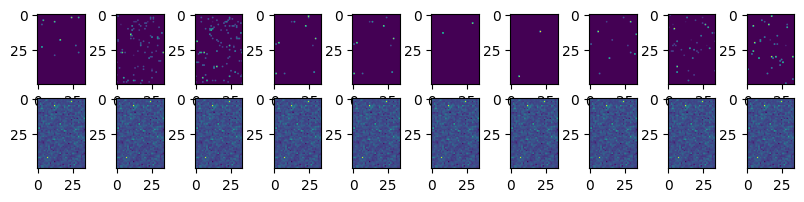

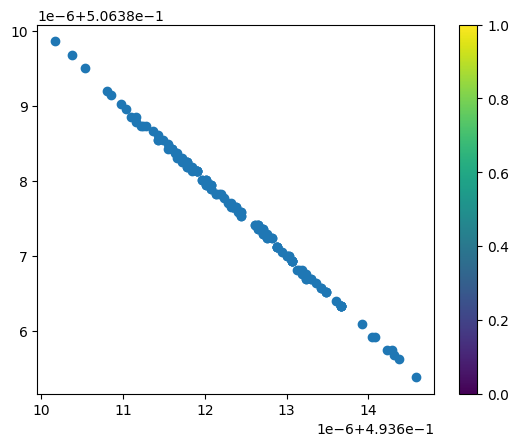

In [68]:
x_train = tfidf_matrix
x_test = tfidf_matrix
#-----------------------------训练和测试------------------------------
#训练
lstmautoencoder.fit(x_train, 
        x_train,
        epochs=20,
        batch_size=5,
        shuffle=True)

# #预测
# encoded_imgs = encoder.predict(x_test)     #压缩二维特征 用于聚类
# decoded_imgs = autoencoder.predict(x_test) #自编码器还原的图像
lstmencoded_imgs = lstmencoder.predict(x_test)
lstmdecoded_imgs = lstmautoencoder.predict(x_test)

import numpy as np
#比较原始图像和预测图像数据
f, a = plt.subplots(2, 10, figsize=(10, 2))
for i in range(10):
    a[0][i].imshow(np.reshape(x_test[i], (50, 34)))
    a[1][i].imshow(np.reshape(lstmdecoded_imgs[i], (50, 34)))
plt.show()

#聚类分析
plt.scatter(lstmencoded_imgs[:,0], lstmencoded_imgs[:,1])
plt.colorbar()
plt.show()


In [58]:
i = 1
print(data["用户昵称"][i])
print(lstm_imgs[i])
fenlei(data["用户昵称"][i])

截至14/5/2022晚，马来西亚新增2,373宗，全马累计确诊病例达4,475,873宗。信息来源：马来西亚360方位#新冠肺炎##海外疫情##马来西亚疫情#
[0.02194409]
0.9468313584379755


In [60]:
a = pd.DataFrame([1,2,3,4,5])

In [21]:
fenlei(data["用户昵称"][4])

0.027249607838812695


Building prefix dict from the default dictionary ...
Loading model from cache /var/folders/s9/b33d8sfd6c3626p96qkb_s240000gn/T/jieba.cache


读取数据
(134, 17)
清除重复数据
(128, 17)
清洗数据并画图
清洗文本
文本切割


Loading model cost 0.243 seconds.
Prefix dict has been built successfully.


输出词袋内容：
 ['一个月' '一任' '一份' ... '黯淡' '鼎盛' '齐射']
输出词频前十的词：
 [('齐射', 1699), ('鼎盛', 1698), ('黯淡', 1697), ('黑海', 1696), ('黑洞', 1695), ('鲍里', 1694), ('鬼子', 1693), ('高达', 1692), ('高级官员', 1691), ('高精度', 1690)]
权重矩阵
   (0, 998)	0.14843742098580442
  (0, 947)	0.19619251665560392
  (0, 785)	0.3761255035195232
  (0, 775)	0.1980347107096539
  (0, 628)	0.46114424616488525
  (0, 241)	0.16046908741659693
  (0, 182)	0.3720368470123512
  (0, 140)	0.3420347126760226
  (0, 97)	0.32907399551618116
  (0, 92)	0.395845284035584
  (1, 1683)	0.09203914809368642
  (1, 1655)	0.06336856698312669
  (1, 1639)	0.09203914809368642
  (1, 1637)	0.08481617901876537
  (1, 1632)	0.08481617901876537
  (1, 1616)	0.14493686365621092
  (1, 1611)	0.08481617901876537
  (1, 1610)	0.18501212470211278
  (1, 1606)	0.1394447728646486
  (1, 1555)	0.09203914809368642
  (1, 1535)	0.22714894252135978
  (1, 1474)	0.08481617901876537
  (1, 1462)	0.07246843182810546
  (1, 1422)	0.1099918130434134
  (1, 1385)	0.08481617901876537
  :	:
  (126,

/Users/chengyq/anaconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


画图


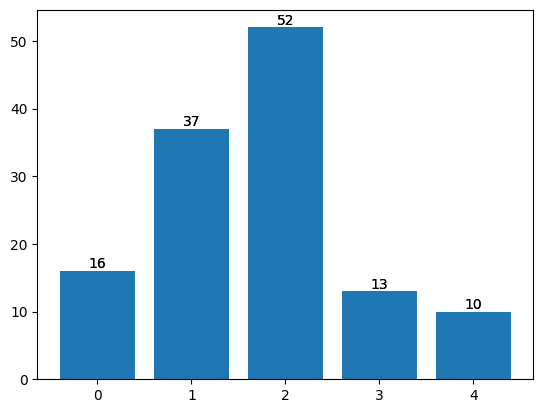

按标签拆分数据集
5


In [1]:
from functions import *

import pandas as pd



#读取数据
print("读取数据")
# data = pd.read_csv('%23新冠肺炎%23.csv')
data = pd.read_csv('%23俄乌战争%23.csv')
print(data.shape)

# 清除重复数据
print("清除重复数据")
data.drop_duplicates('用户昵称',keep='first',inplace=True)
print(data.shape)

print("清洗数据并画图")
word, clean_data = clean_and_plot(data['用户昵称'], ' ', False)
plt.show()

kmeans_result = mykmeans(data['用户昵称'], clean_data, n_clusters=5)

print("画图")
plot_bar_normal(kmeans_result["label"].value_counts().values,kmeans_result["label"].value_counts().index)

print("按标签拆分数据集")
result = splitdata(kmeans_result)
print(len(result))

In [2]:
result[0]

data  label
3                  #俄乌战争#俄军导弹袭击乌克兰西部利沃夫一建筑物L寰亚看世界的微博视频      0
4                 #俄乌战争#俄军导弹袭击乌克兰西部利沃夫一建筑物L寰亚SYHP的微博视频      0
16   美报道:乌军大力反攻！在巴赫穆特南部取得进展，俄军投入所有力量阻挡！#俄乌局势新进展##俄乌...      0
49   【俄军在顿涅茨克的阿夫迪伊夫卡对乌军阵地发起袭击】#俄乌局势新进展##俄乌战争#（视频来源网...      0
59   俄乌战争俄军在顿涅茨克的阿夫迪伊夫卡对乌军阵地发起袭击……#随手拍##关注俄乌局势最新进展#...      0
60   乌军车辆行驶中压爆地雷的场景，车上人员像物品一样散落四周，惨叫不断。#俄乌战争#这样的惨剧不...      0
62           #俄乌战争#俄军在顿涅茨克的阿夫迪伊夫卡对乌军阵地发起袭击。L寰亚看世界的微博视频      0
63          #俄乌战争#俄军在顿涅茨克的阿夫迪伊夫卡对乌军阵地发起袭击。L寰亚SYHP的微博视频      0
70   今天，人们在基辅向作家维多利亚·阿梅丽娜告别，她于7月1日在克拉马托尔斯克的导弹袭击中丧生。...      0
92   【乌军5架无人机袭击莫斯科，导致莫斯科伏努科沃机场一度暂停】#俄乌局势新进展##俄乌战争#今...      0
96   2023年7月4日，记者叶连娜·米拉什娜再次在车臣遭到殴打。2020年2月，她和律师玛丽娜·...      0
102  7月4日，俄罗斯宣布首次击落“风暴影子”巡航导弹。俄军展示了“风暴影子”巡航导弹残骸，但有人...      0
108  乌承认：俄军发动415次炮击！俄军开始攻城略地？#俄乌局势新进展##俄乌战争#L墙上的枪的微博视频      0
112            #俄乌战争#号称加入俄军的中国人武民，发了新视频。感觉就是个神经病。O网页链接      0
114             #俄乌战争#扎波罗热：俄军成功夺回了卢戈夫斯科耶村的部分阵地。战斗仍在继续。      0
115  #俄乌战争#今早，乌军无人机群袭击莫斯科郊外库宾卡的俄军设施，莫斯科伏努科沃机场也遭到攻击。...      0

In [3]:
word

[('齐射', 1699),
 ('鼎盛', 1698),
 ('黯淡', 1697),
 ('黑海', 1696),
 ('黑洞', 1695),
 ('鲍里', 1694),
 ('鬼子', 1693),
 ('高达', 1692),
 ('高级官员', 1691),
 ('高精度', 1690)]